In [ ]:

# Step 2: Convert to array: (98 files × 13 features)
features = np.array(file_features)





Model loaded from forecast_cluster1_lstm.keras


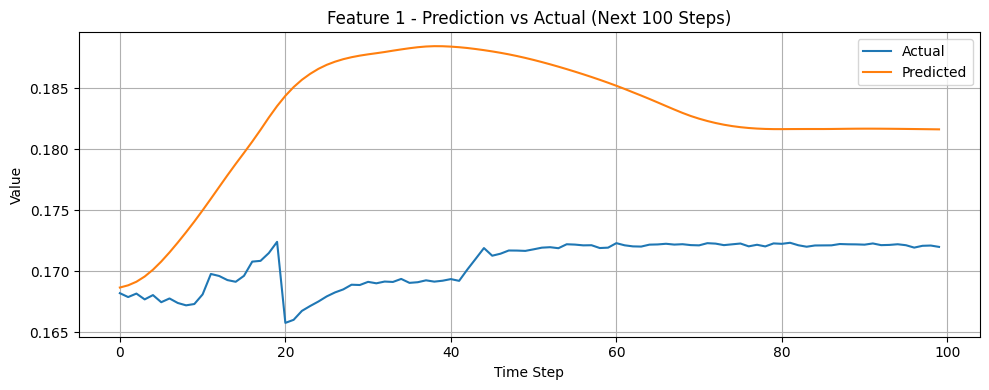

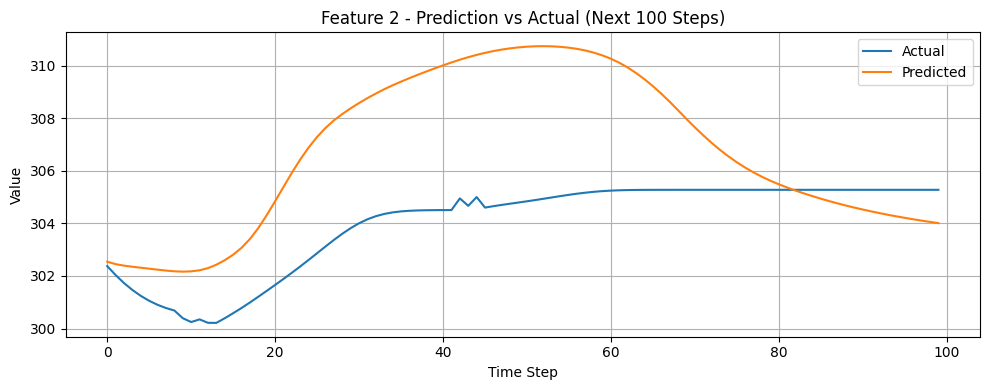

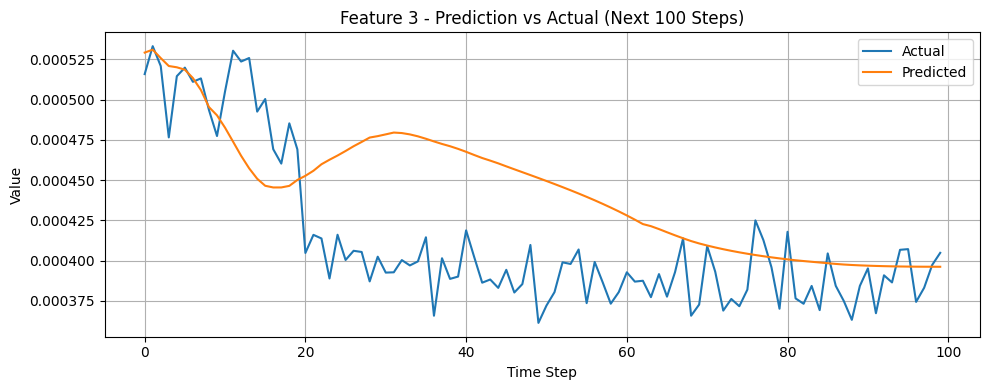

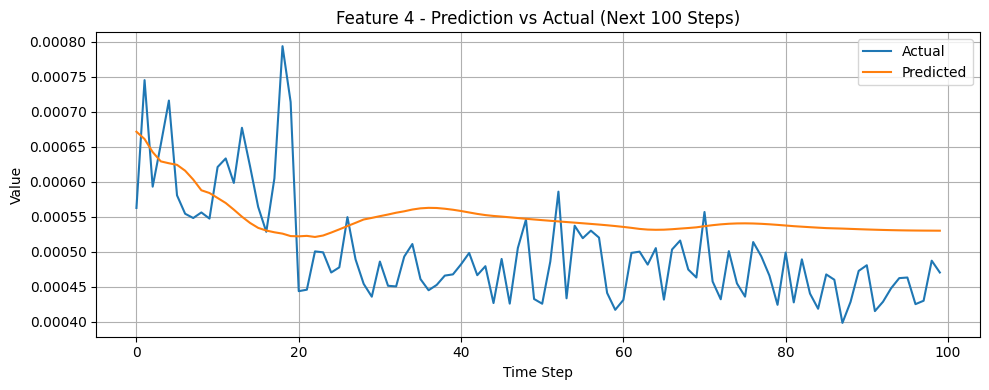

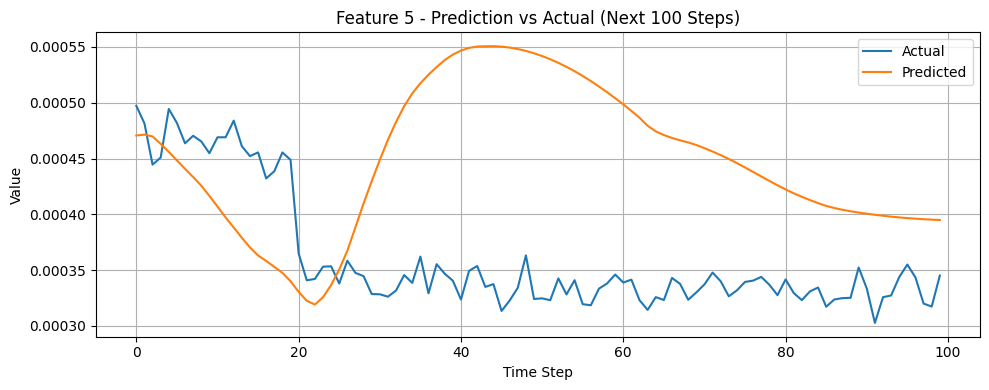

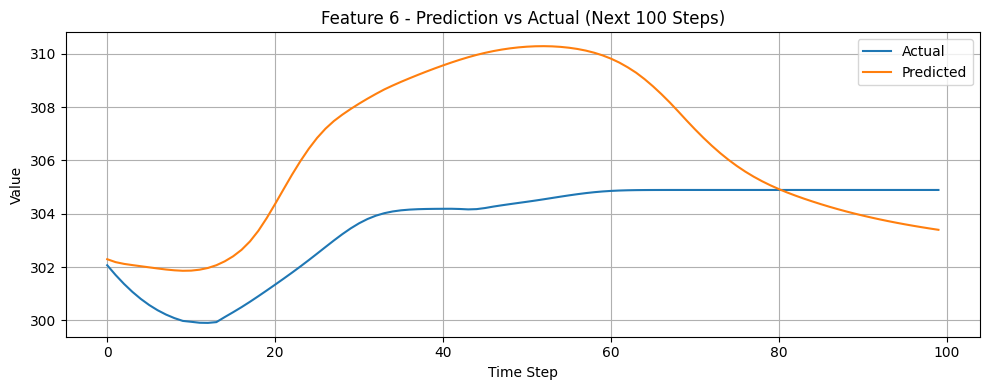

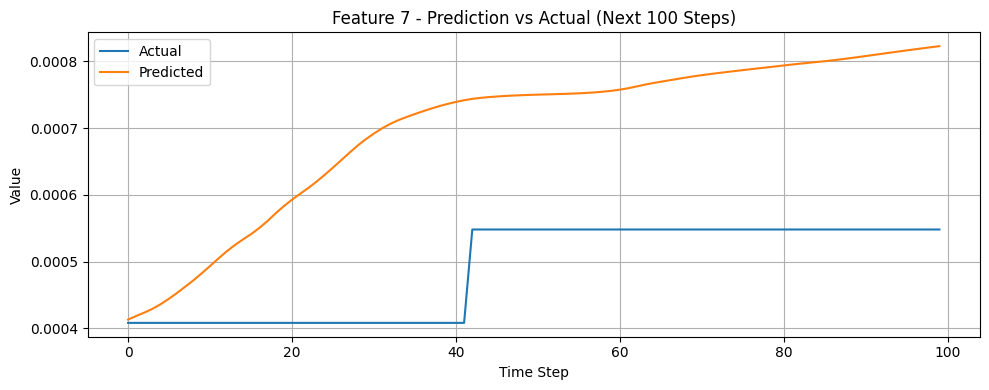

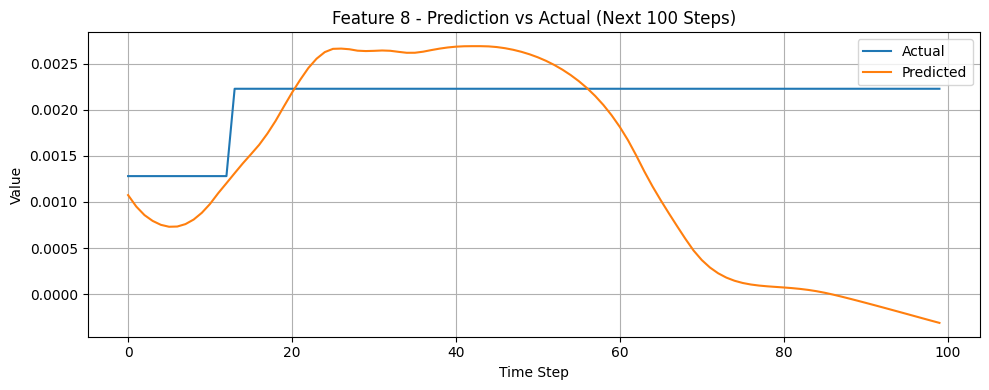

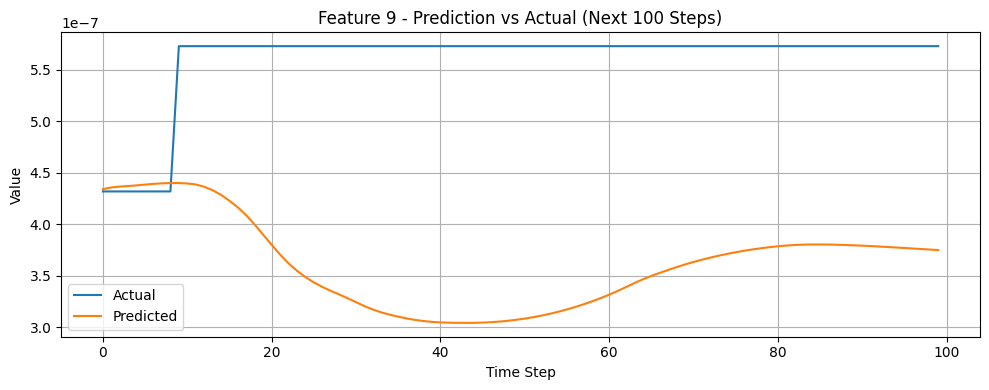

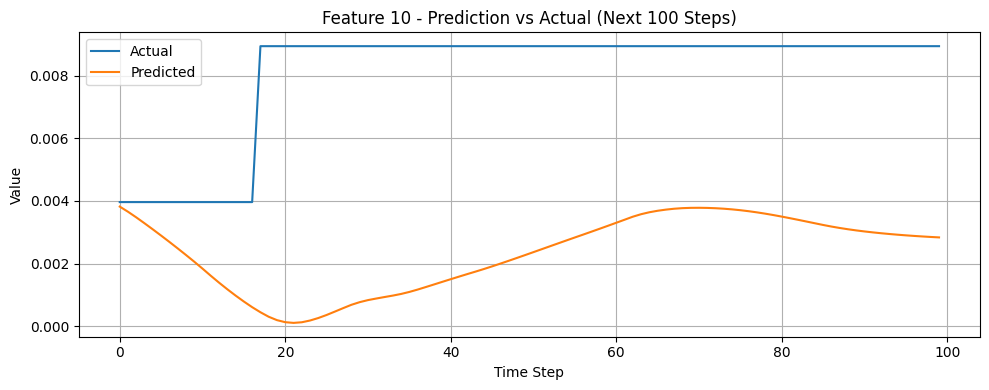

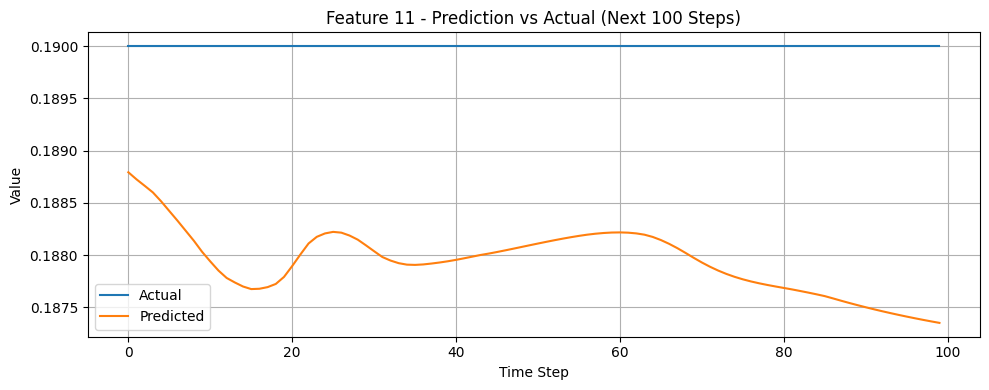

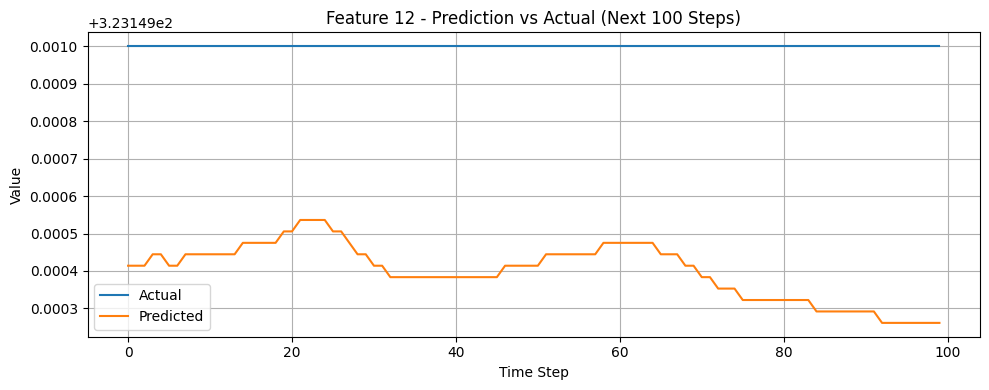

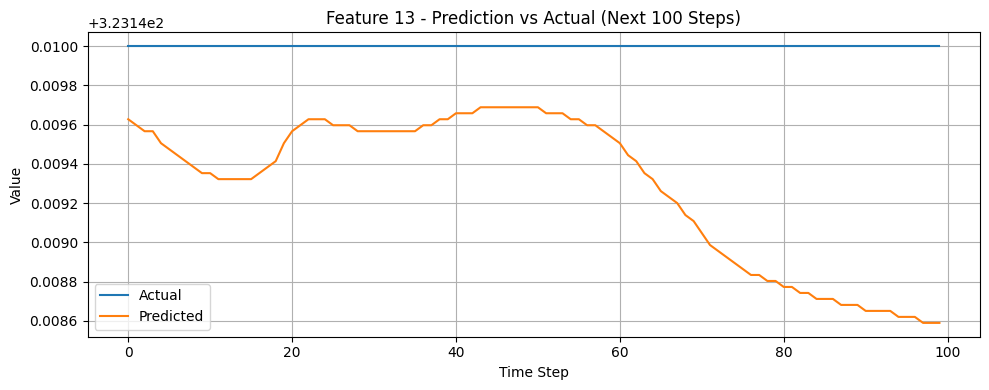

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model

# --- Configuration ---
MODEL_PATH = 'forecast_cluster1_lstm.keras'  # or cluster2
FILE_PATH = 'Data/file_15229.txt'     # your crystallization process file
T = 10                                # timesteps used in training
N_PREDICT = 100                       # number of steps to forecast

# --- Load Model ---
model = load_model(MODEL_PATH)
print(f"Model loaded from {MODEL_PATH}")

# --- Load Data ---
df = pd.read_csv(FILE_PATH, sep=None, engine='python')
df = df.iloc[1:]  # skip header
df = df.apply(pd.to_numeric, errors='coerce').dropna()
data = df.values

# --- Preprocessing ---
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# --- Prepare seed sequence (first 500 rows) ---
seed_seq = data_scaled[:500].copy()  # shape: (500, 13)
true_future = data_scaled[500:600]   # ground truth for comparison

# --- Predict next 100 steps one-by-one using sliding window ---
predictions = []

current_seq = seed_seq[-T:].copy()  # initial 10-step window
for i in range(N_PREDICT):
    input_seq = current_seq.reshape(1, T, 13)
    pred = model.predict(input_seq, verbose=0)
    predictions.append(pred[0])
    # slide the window
    current_seq = np.vstack([current_seq[1:], pred[0]])

# --- Inverse transform to original scale ---
predictions_orig = scaler.inverse_transform(np.array(predictions))
true_future_orig = scaler.inverse_transform(true_future)

# --- Plot predictions vs actual for each feature ---
for i in range(13):
    plt.figure(figsize=(10, 4))
    plt.plot(true_future_orig[:, i], label='Actual')
    plt.plot(predictions_orig[:, i], label='Predicted')
    plt.title(f'Feature {i+1} - Prediction vs Actual (Next 100 Steps)')
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [2]:
# Input clusters
KMeans_cluster0 = ['file_14894.txt', 'file_17860.txt', 'file_18883.txt', 'file_22059.txt', 'file_2993.txt',
    'file_31274.txt', 'file_33091.txt', 'file_3388.txt', 'file_35884.txt', 'file_37125.txt',
    'file_3742.txt', 'file_3835.txt', 'file_39936.txt', 'file_40489.txt', 'file_40558.txt',
    'file_41551.txt', 'file_49595.txt', 'file_50617.txt', 'file_51993.txt', 'file_5325.txt',
    'file_53588.txt', 'file_54889.txt', 'file_55946.txt', 'file_57262.txt', 'file_58911.txt',
    'file_59753.txt', 'file_62960.txt', 'file_63561.txt', 'file_63816.txt', 'file_66498.txt',
    'file_68111.txt', 'file_70685.txt', 'file_72972.txt', 'file_7336.txt', 'file_75800.txt',
    'file_77484.txt', 'file_82278.txt', 'file_86885.txt', 'file_87385.txt', 'file_87603.txt',
    'file_88407.txt', 'file_90200.txt', 'file_9102.txt', 'file_92216.txt', 'file_92329.txt',
    'file_92454.txt', 'file_92834.txt', 'file_97857.txt', 'file_9803.txt']

KMeans_cluster1 = ['file_15229.txt', 'file_15576.txt', 'file_16361.txt', 'file_20658.txt', 'file_20726.txt',
    'file_20785.txt', 'file_22620.txt', 'file_22636.txt', 'file_2345.txt', 'file_25611.txt',
    'file_26408.txt', 'file_27517.txt', 'file_28440.txt', 'file_29351.txt', 'file_34890.txt',
    'file_3834.txt', 'file_38361.txt', 'file_39455.txt', 'file_42685.txt', 'file_43864.txt',
    'file_46647.txt', 'file_50501.txt', 'file_51551.txt', 'file_54059.txt', 'file_54097.txt',
    'file_55007.txt', 'file_55801.txt', 'file_56035.txt', 'file_56250.txt', 'file_57858.txt',
    'file_58631.txt', 'file_61276.txt', 'file_62851.txt', 'file_62881.txt', 'file_65538.txt',
    'file_67537.txt', 'file_69268.txt', 'file_71331.txt', 'file_73559.txt', 'file_74771.txt',
    'file_77600.txt', 'file_79990.txt', 'file_81731.txt', 'file_83091.txt', 'file_96463.txt',
    'file_96991.txt', 'file_971.txt', 'file_9985.txt']

cluster_0_files = ["file_15576.txt", "file_18883.txt", "file_20726.txt", "file_20785.txt", "file_22620.txt",
    "file_22636.txt", "file_26408.txt", "file_33091.txt", "file_34890.txt", "file_35884.txt",
    "file_37125.txt", "file_38361.txt", "file_39936.txt", "file_41551.txt", "file_42685.txt",
    "file_43864.txt", "file_51993.txt", "file_5325.txt", "file_53588.txt", "file_54889.txt",
    "file_55946.txt", "file_57858.txt", "file_58631.txt", "file_58911.txt", "file_61276.txt",
    "file_67537.txt", "file_68111.txt", "file_69268.txt", "file_70685.txt", "file_73559.txt",
    "file_75800.txt", "file_77484.txt", "file_79990.txt", "file_81731.txt", "file_82278.txt",
    "file_88407.txt", "file_90200.txt", "file_9102.txt", "file_92216.txt", "file_92834.txt",
    "file_96991.txt", "file_971.txt"]

cluster_1_files = ["file_14894.txt", "file_16361.txt", "file_17860.txt", "file_20658.txt", "file_22059.txt",
    "file_2345.txt", "file_25611.txt", "file_27517.txt", "file_29351.txt", "file_3388.txt",
    "file_3742.txt", "file_3834.txt", "file_3835.txt", "file_39455.txt", "file_40489.txt",
    "file_46647.txt", "file_49595.txt", "file_50501.txt", "file_50617.txt", "file_51551.txt",
    "file_54059.txt", "file_55007.txt", "file_56035.txt", "file_56250.txt", "file_57262.txt",
    "file_59753.txt", "file_62851.txt", "file_62881.txt", "file_62960.txt", "file_63561.txt",
    "file_63816.txt", "file_65538.txt", "file_66498.txt", "file_72972.txt", "file_7336.txt",
    "file_74771.txt", "file_77600.txt", "file_83091.txt", "file_87603.txt", "file_92329.txt",
    "file_92454.txt", "file_9803.txt", "file_9985.txt"]

# Convert to sets for comparison
kmeans_labels = {}
for f in KMeans_cluster0:
    kmeans_labels[f] = 0
for f in KMeans_cluster1:
    kmeans_labels[f] = 1

other_labels = {}
for f in cluster_0_files:
    other_labels[f] = 0
for f in cluster_1_files:
    other_labels[f] = 1

# Compare cluster assignments
common_files = set(kmeans_labels.keys()) & set(other_labels.keys())
same_cluster = [f for f in common_files if kmeans_labels[f] == other_labels[f]]
diff_cluster = [f for f in common_files if kmeans_labels[f] != other_labels[f]]

# Print summary
print(f"Total common files: {len(common_files)}")
print(f"Same cluster in both: {len(same_cluster)}")
print(f"Different clusters: {len(diff_cluster)}")

# Optional: print mismatches
if diff_cluster:
    print("\n📌 Files with different cluster assignment:")
    for f in diff_cluster:
        print(f"  {f} → KMeans: {kmeans_labels[f]} | Other: {other_labels[f]}")


Total common files: 85
Same cluster in both: 44
Different clusters: 41

📌 Files with different cluster assignment:
  file_38361.txt → KMeans: 1 | Other: 0
  file_57262.txt → KMeans: 0 | Other: 1
  file_20726.txt → KMeans: 1 | Other: 0
  file_7336.txt → KMeans: 0 | Other: 1
  file_22059.txt → KMeans: 0 | Other: 1
  file_49595.txt → KMeans: 0 | Other: 1
  file_9803.txt → KMeans: 0 | Other: 1
  file_73559.txt → KMeans: 1 | Other: 0
  file_96991.txt → KMeans: 1 | Other: 0
  file_50617.txt → KMeans: 0 | Other: 1
  file_40489.txt → KMeans: 0 | Other: 1
  file_61276.txt → KMeans: 1 | Other: 0
  file_971.txt → KMeans: 1 | Other: 0
  file_67537.txt → KMeans: 1 | Other: 0
  file_66498.txt → KMeans: 0 | Other: 1
  file_59753.txt → KMeans: 0 | Other: 1
  file_3835.txt → KMeans: 0 | Other: 1
  file_57858.txt → KMeans: 1 | Other: 0
  file_58631.txt → KMeans: 1 | Other: 0
  file_17860.txt → KMeans: 0 | Other: 1
  file_87603.txt → KMeans: 0 | Other: 1
  file_3388.txt → KMeans: 0 | Other: 1
  file_6381

In [3]:
import os
import shutil

# --- CONFIG ---
source_folder = 'Data'  # <-- CHANGE THIS
cluster_0_folder = os.path.join(source_folder, 'cluster_0')
cluster_1_folder = os.path.join(source_folder, 'cluster_1')

# Create destination folders if they don't exist
os.makedirs(cluster_0_folder, exist_ok=True)
os.makedirs(cluster_1_folder, exist_ok=True)

# --- File Lists ---
cluster_0_files = ["file_15576.txt", "file_18883.txt", "file_20726.txt", "file_20785.txt", "file_22620.txt",
    "file_22636.txt", "file_26408.txt", "file_33091.txt", "file_34890.txt", "file_35884.txt",
    "file_37125.txt", "file_38361.txt", "file_39936.txt", "file_41551.txt", "file_42685.txt",
    "file_43864.txt", "file_51993.txt", "file_5325.txt", "file_53588.txt", "file_54889.txt",
    "file_55946.txt", "file_57858.txt", "file_58631.txt", "file_58911.txt", "file_61276.txt",
    "file_67537.txt", "file_68111.txt", "file_69268.txt", "file_70685.txt", "file_73559.txt",
    "file_75800.txt", "file_77484.txt", "file_79990.txt", "file_81731.txt", "file_82278.txt",
    "file_88407.txt", "file_90200.txt", "file_9102.txt", "file_92216.txt", "file_92834.txt",
    "file_96991.txt", "file_971.txt"]

cluster_1_files = ["file_14894.txt", "file_16361.txt", "file_17860.txt", "file_20658.txt", "file_22059.txt",
    "file_2345.txt", "file_25611.txt", "file_27517.txt", "file_29351.txt", "file_3388.txt",
    "file_3742.txt", "file_3834.txt", "file_3835.txt", "file_39455.txt", "file_40489.txt",
    "file_46647.txt", "file_49595.txt", "file_50501.txt", "file_50617.txt", "file_51551.txt",
    "file_54059.txt", "file_55007.txt", "file_56035.txt", "file_56250.txt", "file_57262.txt",
    "file_59753.txt", "file_62851.txt", "file_62881.txt", "file_62960.txt", "file_63561.txt",
    "file_63816.txt", "file_65538.txt", "file_66498.txt", "file_72972.txt", "file_7336.txt",
    "file_74771.txt", "file_77600.txt", "file_83091.txt", "file_87603.txt", "file_92329.txt",
    "file_92454.txt", "file_9803.txt", "file_9985.txt"]

# --- Move files ---
for file in cluster_0_files:
    src = os.path.join(source_folder, file)
    dst = os.path.join(cluster_0_folder, file)
    if os.path.exists(src):
        shutil.move(src, dst)

for file in cluster_1_files:
    src = os.path.join(source_folder, file)
    dst = os.path.join(cluster_1_folder, file)
    if os.path.exists(src):
        shutil.move(src, dst)

print("✅ Files moved into 'cluster_0/' and 'cluster_1/' folders.")


✅ Files moved into 'cluster_0/' and 'cluster_1/' folders.


In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, MaxPooling1D, Dropout, BatchNormalization, Input, Concatenate
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l1_l2
import warnings
warnings.filterwarnings('ignore')


In [5]:

class TimeSeriesPredictor:
    def __init__(self, data_dir="cluster_0", sequence_length=10):
        """
        Initialize the TimeSeriesPredictor
        
        Args:
            data_dir: Directory containing the cluster_0 files
            sequence_length: Number of previous steps to use for prediction
        """
        self.data_dir = data_dir
        self.sequence_length = sequence_length
        self.scaler = MinMaxScaler()
        self.models = {}
        self.histories = {}
        self.results = {}
        
    def load_and_preprocess_data(self):
        """Load all files from cluster_0 and preprocess the data"""
        print("Loading and preprocessing data...")
        
        all_data = []
        file_names = []
        
        # Load all files
        for file_name in os.listdir(self.data_dir):
            if file_name.endswith('.txt'):
                file_path = os.path.join(self.data_dir, file_name)
                try:
                    # Load data, skip header
                    data = np.genfromtxt(file_path, delimiter='\t', skip_header=1)
                    if data.shape[0] == 1000 and data.shape[1] == 13:
                        all_data.append(data)
                        file_names.append(file_name)
                        print(f"Loaded {file_name}: {data.shape}")
                except Exception as e:
                    print(f"Error loading {file_name}: {e}")
        
        if not all_data:
            raise ValueError("No valid data files found!")
        
        print(f"Successfully loaded {len(all_data)} files")
        
        # Combine all data
        self.raw_data = np.array(all_data)  # Shape: (54, 1000, 13)
        self.file_names = file_names
        
        # Normalize data
        self.normalized_data = self.scaler.fit_transform(
            self.raw_data.reshape(-1, 13)
        ).reshape(self.raw_data.shape)
        
        print(f"Data shape: {self.raw_data.shape}")
        print(f"Normalized data shape: {self.normalized_data.shape}")
        
        return self.normalized_data
    
    def create_sequences(self, data, target_steps=1):
        """
        Create sequences for time series prediction
        
        Args:
            data: Input data of shape (n_samples, n_timesteps, n_features)
            target_steps: Number of future steps to predict
        """
        X, y = [], []
        
        for process in data:  # Each process has shape (1000, 13)
            for i in range(self.sequence_length, len(process) - target_steps + 1):
                # Input sequence
                X.append(process[i-self.sequence_length:i])
                # Target (next step or future steps)
                y.append(process[i:i+target_steps])
        
        return np.array(X), np.array(y)
    
    def create_mlp_model(self, input_shape, output_shape, **kwargs):
        """Create Multi-Layer Perceptron model"""
        model = Sequential([
            Dense(128, activation='relu', input_shape=input_shape),
            Dropout(0.3),
            Dense(64, activation='relu'),
            Dropout(0.2),
            Dense(32, activation='relu'),
            Dense(output_shape, activation='linear')
        ])
        return model
    
    def create_lstm_model(self, input_shape, output_shape, **kwargs):
        """Create LSTM model"""
        model = Sequential([
            LSTM(128, return_sequences=True, input_shape=input_shape),
            Dropout(0.3),
            LSTM(64, return_sequences=False),
            Dropout(0.2),
            Dense(32, activation='relu'),
            Dense(output_shape, activation='linear')
        ])
        return model
    
    def create_gru_model(self, input_shape, output_shape, **kwargs):
        """Create GRU model"""
        model = Sequential([
            GRU(128, return_sequences=True, input_shape=input_shape),
            Dropout(0.3),
            GRU(64, return_sequences=False),
            Dropout(0.2),
            Dense(32, activation='relu'),
            Dense(output_shape, activation='linear')
        ])
        return model
    
    def create_cnn_lstm_model(self, input_shape, output_shape, **kwargs):
        """Create CNN-LSTM hybrid model"""
        model = Sequential([
            Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
            MaxPooling1D(pool_size=2),
            Conv1D(filters=32, kernel_size=3, activation='relu'),
            MaxPooling1D(pool_size=2),
            LSTM(64, return_sequences=False),
            Dropout(0.3),
            Dense(32, activation='relu'),
            Dense(output_shape, activation='linear')
        ])
        return model
    
    def create_advanced_lstm_model(self, input_shape, output_shape, **kwargs):
        """Create advanced LSTM model with attention-like mechanism"""
        inputs = Input(shape=input_shape)
        
        # Bidirectional LSTM layers
        lstm1 = LSTM(128, return_sequences=True)(inputs)
        lstm1 = Dropout(0.3)(lstm1)
        
        lstm2 = LSTM(64, return_sequences=True)(lstm1)
        lstm2 = Dropout(0.3)(lstm2)
        
        lstm3 = LSTM(32, return_sequences=False)(lstm2)
        lstm3 = Dropout(0.2)(lstm3)
        
        # Dense layers
        dense1 = Dense(64, activation='relu')(lstm3)
        dense1 = BatchNormalization()(dense1)
        dense1 = Dropout(0.2)(dense1)
        
        dense2 = Dense(32, activation='relu')(dense1)
        dense2 = Dropout(0.1)(dense2)
        
        outputs = Dense(output_shape, activation='linear')(dense2)
        
        model = Model(inputs=inputs, outputs=outputs)
        return model
    
    def train_model(self, model, X_train, y_train, X_val, y_val, model_name, **kwargs):
        """Train a model with given parameters"""
        print(f"\nTraining {model_name}...")
        
        # Compile model
        optimizer = kwargs.get('optimizer', 'adam')
        learning_rate = kwargs.get('learning_rate', 0.001)
        
        if optimizer == 'adam':
            opt = Adam(learning_rate=learning_rate)
        elif optimizer == 'rmsprop':
            opt = RMSprop(learning_rate=learning_rate)
        else:
            opt = SGD(learning_rate=learning_rate)
        
        model.compile(optimizer=opt, loss='mse', metrics=['mae'])
        
        # Callbacks
        callbacks = [
            EarlyStopping(patience=20, restore_best_weights=True, verbose=1),
            ReduceLROnPlateau(factor=0.5, patience=10, verbose=1),
            ModelCheckpoint(f'models/{model_name}_best.h5', save_best_only=True, verbose=1)
        ]
        
        # Train model
        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=kwargs.get('epochs', 100),
            batch_size=kwargs.get('batch_size', 32),
            callbacks=callbacks,
            verbose=1
        )
        
        return model, history
    
    def evaluate_model(self, model, X_test, y_test, model_name):
        """Evaluate model performance"""
        print(f"\nEvaluating {model_name}...")
        
        # Predictions
        y_pred = model.predict(X_test)
        
        # Reshape for evaluation
        y_test_flat = y_test.reshape(-1, y_test.shape[-1])
        y_pred_flat = y_pred.reshape(-1, y_pred.shape[-1])
        
        # Calculate metrics
        mse = mean_squared_error(y_test_flat, y_pred_flat)
        mae = mean_absolute_error(y_test_flat, y_pred_flat)
        r2 = r2_score(y_test_flat, y_pred_flat)
        
        # Calculate metrics for each feature
        feature_metrics = {}
        for i in range(y_test_flat.shape[1]):
            feature_mse = mean_squared_error(y_test_flat[:, i], y_pred_flat[:, i])
            feature_mae = mean_absolute_error(y_test_flat[:, i], y_pred_flat[:, i])
            feature_r2 = r2_score(y_test_flat[:, i], y_pred_flat[:, i])
            feature_metrics[f'feature_{i}'] = {
                'mse': feature_mse,
                'mae': feature_mae,
                'r2': feature_r2
            }
        
        results = {
            'mse': mse,
            'mae': mae,
            'r2': r2,
            'feature_metrics': feature_metrics,
            'predictions': y_pred_flat,
            'actuals': y_test_flat
        }
        
        print(f"{model_name} Results:")
        print(f"MSE: {mse:.6f}")
        print(f"MAE: {mae:.6f}")
        print(f"R²: {r2:.6f}")
        
        return results
    
    def hyperparameter_tuning(self, model_type, X_train, y_train, X_val, y_val):
        """Perform hyperparameter tuning for a given model type"""
        print(f"\nPerforming hyperparameter tuning for {model_type}...")
        
        # Define hyperparameter grid
        if model_type == 'mlp':
            param_grid = {
                'hidden_layers': [[128, 64], [256, 128, 64], [128, 64, 32]],
                'dropout_rate': [0.2, 0.3, 0.4],
                'learning_rate': [0.001, 0.01, 0.0001],
                'batch_size': [16, 32, 64]
            }
        elif model_type in ['lstm', 'gru']:
            param_grid = {
                'units': [[128, 64], [256, 128], [64, 32]],
                'dropout_rate': [0.2, 0.3, 0.4],
                'learning_rate': [0.001, 0.01, 0.0001],
                'batch_size': [16, 32, 64]
            }
        else:
            param_grid = {
                'filters': [[64, 32], [128, 64]],
                'dropout_rate': [0.2, 0.3],
                'learning_rate': [0.001, 0.01],
                'batch_size': [16, 32]
            }
        
        best_score = float('inf')
        best_params = None
        best_model = None
        
        # Grid search
        total_combinations = 1
        for param_list in param_grid.values():
            total_combinations *= len(param_list)
        
        print(f"Testing {total_combinations} parameter combinations...")
        
        for i, params in enumerate(self._generate_param_combinations(param_grid)):
            print(f"\nTesting combination {i+1}/{total_combinations}: {params}")
            
            # Create and train model
            model = self._create_model_with_params(model_type, params, X_train.shape[1:], y_train.shape[-1])
            model, history = self.train_model(model, X_train, y_train, X_val, y_val, f"{model_type}_tune", **params)
            
            # Evaluate
            val_loss = min(history.history['val_loss'])
            
            if val_loss < best_score:
                best_score = val_loss
                best_params = params
                best_model = model
                print(f"New best score: {best_score:.6f}")
        
        print(f"\nBest parameters for {model_type}: {best_params}")
        print(f"Best validation loss: {best_score:.6f}")
        
        return best_model, best_params
    
    def _generate_param_combinations(self, param_grid):
        """Generate all combinations of parameters"""
        import itertools
        keys = param_grid.keys()
        values = param_grid.values()
        combinations = list(itertools.product(*values))
        
        for combo in combinations:
            yield dict(zip(keys, combo))
    
    def _create_model_with_params(self, model_type, params, input_shape, output_shape):
        """Create model with specific parameters"""
        if model_type == 'mlp':
            return self.create_mlp_model(input_shape, output_shape, **params)
        elif model_type == 'lstm':
            return self.create_lstm_model(input_shape, output_shape, **params)
        elif model_type == 'gru':
            return self.create_gru_model(input_shape, output_shape, **params)
        elif model_type == 'cnn_lstm':
            return self.create_cnn_lstm_model(input_shape, output_shape, **params)
        else:
            return self.create_advanced_lstm_model(input_shape, output_shape, **params)
    
    def predict_future_step(self, model, data, target_step=501):
        """Predict a specific future step (e.g., step 501)"""
        print(f"\nPredicting step {target_step}...")
        
        # For step 501, we need to predict beyond the available data
        # We'll use the last available sequence to predict the next step
        last_sequence = data[-1, -self.sequence_length:, :]  # Last sequence from last process
        
        # Make prediction
        prediction = model.predict(last_sequence.reshape(1, self.sequence_length, -1))
        
        print(f"Predicted values for step {target_step}:")
        for i, val in enumerate(prediction[0]):
            print(f"Feature {i}: {val:.6f}")
        
        return prediction[0]
    
    def plot_results(self, results):
        """Plot training results and predictions"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # Plot training history for each model
        for i, (model_name, history) in enumerate(self.histories.items()):
            axes[0, 0].plot(history.history['loss'], label=f'{model_name} - Train')
            axes[0, 0].plot(history.history['val_loss'], label=f'{model_name} - Val')
        
        axes[0, 0].set_title('Training Loss')
        axes[0, 0].set_xlabel('Epoch')
        axes[0, 0].set_ylabel('Loss')
        axes[0, 0].legend()
        axes[0, 0].grid(True)
        
        # Plot model comparison
        model_names = list(results.keys())
        mse_scores = [results[name]['mse'] for name in model_names]
        mae_scores = [results[name]['mae'] for name in model_names]
        
        x = np.arange(len(model_names))
        width = 0.35
        
        axes[0, 1].bar(x - width/2, mse_scores, width, label='MSE')
        axes[0, 1].bar(x + width/2, mae_scores, width, label='MAE')
        axes[0, 1].set_title('Model Performance Comparison')
        axes[0, 1].set_xlabel('Models')
        axes[0, 1].set_ylabel('Error')
        axes[0, 1].set_xticks(x)
        axes[0, 1].set_xticklabels(model_names, rotation=45)
        axes[0, 1].legend()
        axes[0, 1].grid(True)
        
        # Plot predictions vs actual for best model
        best_model = min(results.keys(), key=lambda x: results[x]['mse'])
        y_pred = results[best_model]['predictions']
        y_actual = results[best_model]['actuals']
        
        axes[1, 0].scatter(y_actual.flatten(), y_pred.flatten(), alpha=0.5)
        axes[1, 0].plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--', lw=2)
        axes[1, 0].set_title(f'Predictions vs Actual ({best_model})')
        axes[1, 0].set_xlabel('Actual Values')
        axes[1, 0].set_ylabel('Predicted Values')
        axes[1, 0].grid(True)
        
        # Plot feature-wise performance
        feature_r2 = [results[best_model]['feature_metrics'][f'feature_{i}']['r2'] 
                     for i in range(len(results[best_model]['feature_metrics']))]
        
        axes[1, 1].bar(range(len(feature_r2)), feature_r2)
        axes[1, 1].set_title(f'Feature-wise R² Score ({best_model})')
        axes[1, 1].set_xlabel('Features')
        axes[1, 1].set_ylabel('R² Score')
        axes[1, 1].grid(True)
        
        plt.tight_layout()
        plt.savefig('ann_training_results.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def run_complete_analysis(self, target_steps=1):
        """Run complete analysis with all models and hyperparameter tuning"""
        print("="*60)
        print("ANN TIME SERIES PREDICTION ANALYSIS")
        print("="*60)
        
        # Create models directory
        os.makedirs('models', exist_ok=True)
        
        # Load and preprocess data
        data = self.load_and_preprocess_data()
        
        # Create sequences
        X, y = self.create_sequences(data, target_steps)
        print(f"Created sequences: X shape {X.shape}, y shape {y.shape}")
        
        # Split data
        X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)
        
        print(f"Train set: {X_train.shape}")
        print(f"Validation set: {X_val.shape}")
        print(f"Test set: {X_test.shape}")
        
        # Define models to test
        model_configs = {
            'MLP': {'type': 'mlp', 'params': {'epochs': 100, 'batch_size': 32}},
            'LSTM': {'type': 'lstm', 'params': {'epochs': 100, 'batch_size': 32}},
            'GRU': {'type': 'gru', 'params': {'epochs': 100, 'batch_size': 32}},
            'CNN-LSTM': {'type': 'cnn_lstm', 'params': {'epochs': 100, 'batch_size': 32}},
            'Advanced_LSTM': {'type': 'advanced_lstm', 'params': {'epochs': 100, 'batch_size': 32}}
        }
        
        # Train and evaluate each model
        for model_name, config in model_configs.items():
            print(f"\n{'='*40}")
            print(f"TRAINING {model_name}")
            print(f"{'='*40}")
            
            # Create model
            model = self._create_model_with_params(
                config['type'], 
                config['params'], 
                X_train.shape[1:], 
                y_train.shape[-1]
            )
            
            # Train model
            model, history = self.train_model(
                model, X_train, y_train, X_val, y_val, model_name, **config['params']
            )
            
            # Evaluate model
            results = self.evaluate_model(model, X_test, y_test, model_name)
            
            # Store results
            self.models[model_name] = model
            self.histories[model_name] = history
            self.results[model_name] = results
        
        # Find best model
        best_model_name = min(self.results.keys(), key=lambda x: self.results[x]['mse'])
        best_model = self.models[best_model_name]
        
        print(f"\n{'='*60}")
        print(f"BEST MODEL: {best_model_name}")
        print(f"Best MSE: {self.results[best_model_name]['mse']:.6f}")
        print(f"Best MAE: {self.results[best_model_name]['mae']:.6f}")
        print(f"Best R²: {self.results[best_model_name]['r2']:.6f}")
        print(f"{'='*60}")
        
        # Predict future step
        future_prediction = self.predict_future_step(best_model, data, 501)
        
        # Plot results
        self.plot_results(self.results)
        
        # Save results
        self.save_results()
        
        return best_model, self.results

    def save_results(self):
        """Save all results to files"""
        # Save model comparison
        comparison_df = pd.DataFrame({
            'Model': list(self.results.keys()),
            'MSE': [self.results[name]['mse'] for name in self.results.keys()],
            'MAE': [self.results[name]['mae'] for name in self.results.keys()],
            'R2': [self.results[name]['r2'] for name in self.results.keys()]
        })
        comparison_df.to_csv('model_comparison_results.csv', index=False)
        print("Model comparison saved to: model_comparison_results.csv")
        
        # Save detailed results
        with open('training_summary.txt', 'w') as f:
            f.write("ANN TIME SERIES PREDICTION RESULTS\n")
            f.write("="*50 + "\n\n")
            
            for model_name, results in self.results.items():
                f.write(f"{model_name} Results:\n")
                f.write(f"  MSE: {results['mse']:.6f}\n")
                f.write(f"  MAE: {results['mae']:.6f}\n")
                f.write(f"  R²: {results['r2']:.6f}\n\n")
                
                f.write("  Feature-wise Performance:\n")
                for feature, metrics in results['feature_metrics'].items():
                    f.write(f"    {feature}: MSE={metrics['mse']:.6f}, MAE={metrics['mae']:.6f}, R²={metrics['r2']:.6f}\n")
                f.write("\n")
        
        print("Training summary saved to: training_summary.txt")

In [6]:
def main():
    """Main function to run the complete analysis"""
    # Initialize predictor
    predictor = TimeSeriesPredictor(data_dir="cluster_0", sequence_length=10)
    
    # Run complete analysis
    best_model, results = predictor.run_complete_analysis(target_steps=1)
    
    print("\nAnalysis complete! Check the generated files:")
    print("- ann_training_results.png (visualization)")
    print("- model_comparison_results.csv (comparison table)")
    print("- training_summary.txt (detailed results)")
    print("- models/ (saved model files)")

if __name__ == "__main__":
    main() 

ANN TIME SERIES PREDICTION ANALYSIS
Loading and preprocessing data...
Loaded file_15229.txt: (1000, 13)
Loaded file_15576.txt: (1000, 13)
Loaded file_18883.txt: (1000, 13)
Loaded file_20726.txt: (1000, 13)
Loaded file_20785.txt: (1000, 13)
Loaded file_22620.txt: (1000, 13)
Loaded file_22636.txt: (1000, 13)
Loaded file_26408.txt: (1000, 13)
Loaded file_28440.txt: (1000, 13)
Loaded file_2993.txt: (1000, 13)
Loaded file_31274.txt: (1000, 13)
Loaded file_33091.txt: (1000, 13)
Loaded file_34890.txt: (1000, 13)
Loaded file_35884.txt: (1000, 13)
Loaded file_37125.txt: (1000, 13)
Loaded file_38361.txt: (1000, 13)
Loaded file_39936.txt: (1000, 13)
Loaded file_40558.txt: (1000, 13)
Loaded file_41551.txt: (1000, 13)
Loaded file_42685.txt: (1000, 13)
Loaded file_43864.txt: (1000, 13)
Loaded file_51993.txt: (1000, 13)
Loaded file_5325.txt: (1000, 13)
Loaded file_53588.txt: (1000, 13)
Loaded file_54097.txt: (1000, 13)
Loaded file_54889.txt: (1000, 13)
Loaded file_55801.txt: (1000, 13)
Loaded file_55

1070/1070 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0551 - mae: 0.1507 - val_loss: 0.0045 - val_mae: 0.0329 - learning_rate: 0.0010
Epoch 2/100
1063/1070 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0083 - mae: 0.0555
Epoch 2: val_loss did not improve from 0.00455
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0083 - mae: 0.0555 - val_loss: 0.0046 - val_mae: 0.0319 - learning_rate: 0.0010
Epoch 3/100
1043/1070 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0065 - mae: 0.0440
Epoch 3: val_loss improved from 0.00455 to 0.00435, saving model to models/MLP_best.h5


1070/1070 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0065 - mae: 0.0440 - val_loss: 0.0043 - val_mae: 0.0294 - learning_rate: 0.0010
Epoch 4/100
1062/1070 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0057 - mae: 0.0378
Epoch 4: val_loss did not improve from 0.00435
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0057 - mae: 0.0378 - val_loss: 0.0045 - val_mae: 0.0288 - learning_rate: 0.0010
Epoch 5/100
1064/1070 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0053 - mae: 0.0341
Epoch 5: val_loss did not improve from 0.00435
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0053 - mae: 0.0341 - val_loss: 0.0044 - val_mae: 0.0277 - learning_rate: 0.0010
Epoch 6/100
1050/1070 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0051 - mae: 0.0318
Epoch 6: val_loss did not improve from 0.00435
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0051 - mae: 0.0318 - val_loss: 0.0050 - val_mae: 0.0318 - learning_rate: 0.0010
Epoch 7/100
1069/1070 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0050 - mae

1070/1070 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0043 - mae: 0.0254 - val_loss: 0.0043 - val_mae: 0.0257 - learning_rate: 5.0000e-04
Epoch 15/100
1056/1070 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0043 - mae: 0.0249
Epoch 15: val_loss did not improve from 0.00425
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0043 - mae: 0.0249 - val_loss: 0.0045 - val_mae: 0.0279 - learning_rate: 5.0000e-04
Epoch 16/100
1042/1070 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0043 - mae: 0.0250
Epoch 16: val_loss did not improve from 0.00425
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0043 - mae: 0.0250 - val_loss: 0.0044 - val_mae: 0.0268 - learning_rate: 5.0000e-04
Epoch 17/100
1044/1070 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0042 - mae: 0.0247
Epoch 17: val_loss did not improve from 0.00425
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0042 - mae: 0.0247 - val_loss: 0.0043 - val_mae: 0.0266 - learning_rate: 5.0000e-04
Epoch 18/100
1054/1070 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

1070/1070 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0043 - mae: 0.0246 - val_loss: 0.0042 - val_mae: 0.0254 - learning_rate: 5.0000e-04
Epoch 20/100
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0042 - mae: 0.0245
Epoch 20: val_loss improved from 0.00424 to 0.00419, saving model to models/MLP_best.h5


1070/1070 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0042 - mae: 0.0245 - val_loss: 0.0042 - val_mae: 0.0257 - learning_rate: 5.0000e-04
Epoch 21/100
1048/1070 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0043 - mae: 0.0244
Epoch 21: val_loss did not improve from 0.00419
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0043 - mae: 0.0244 - val_loss: 0.0044 - val_mae: 0.0265 - learning_rate: 5.0000e-04
Epoch 22/100
1052/1070 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0042 - mae: 0.0241
Epoch 22: val_loss did not improve from 0.00419
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0042 - mae: 0.0241 - val_loss: 0.0045 - val_mae: 0.0276 - learning_rate: 5.0000e-04
Epoch 23/100
1059/1070 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0043 - mae: 0.0242
Epoch 23: val_loss did not improve from 0.00419
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0043 - mae: 0.0242 - val_loss: 0.0042 - val_mae: 0.0254 - learning_rate: 5.0000e-04
Epoch 24/100
1045/1070 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

ValueError: Found input variables with inconsistent numbers of samples: [10692, 106920]

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cpu
